In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from scipy import stats, linalg

# Covid Data EDA

In [41]:
src_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv"

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)

In [16]:
df = pd.read_csv( src_url, index_col=False) #, parse_dates=True)

In [17]:
df.head()

df.info()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  126 non-null    object 
 1   Country/Region  276 non-null    object 
 2   Last Update     276 non-null    object 
 3   Confirmed       276 non-null    int64  
 4   Deaths          276 non-null    int64  
 5   Recovered       276 non-null    int64  
 6   Latitude        276 non-null    float64
 7   Longitude       276 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 17.4+ KB


Province/State    150
Country/Region      0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
Latitude            0
Longitude           0
dtype: int64

Text(0.5, 1, 'Null Values')

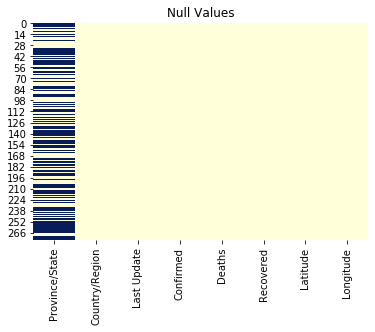

In [18]:
df.isna().sum()

sns.heatmap(df.isna(), cmap="YlGnBu", cbar=False, ).\
    set_title( 'Null Values')

In [22]:
df['Last Update'] = pd.to_datetime( df['Last Update'], errors='coerce', format='%Y-%m-%dT%H:%M:%S')


In [29]:
df['Active'] = df['Confirmed'] - df['Recovered'] - df['Deaths']

In [117]:
def tabulate_cases(
    grpz = ['Country/Region' ],
    varz = ['Confirmed', 'Deaths', 'Recovered', 'Active'],
    country=None, 
    qfilter=None,
    sorter=None
    ):
    
#     t = df.pivot_table(index=grpz, 
#                        values=varz,
#                       aggfunc=[np.sum],
#                       margins=True)[-4:]
#     t.columns = [ f"{i}{j}" for i,j in t.columns.tolist() ]
#     t.sort_values(by=['sumConfirmed'], ascending=False)[:3]
    
    t = df.groupby( grpz )[varz].sum()
    if country:
        t = t.query("`Country/Region` == @country" )
    if qfilter:
        t = t.query( qfilter )
    if sorter:
        t = t.sort_values(**sorter)
    return t

In [118]:
latest = df.groupby( grpz )['Last Update'].max().min()
tabulate_cases()[:3]

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Afghanistan,22,0,1,21
Albania,55,1,0,54
Algeria,60,4,12,44


In [119]:
grpz = ['Country/Region', 'Province/State' ]
country='China'
tabulate_cases( grpz=grpz, country=country)[-3:]

Confirmed  Deaths  Recovered  Active
Country/Region Province/State                                      
China          Xinjiang               76       3         73       0
               Yunnan                176       2        172       2
               Zhejiang             1232       1       1216      15

In [120]:
tabulate_cases(
    qfilter = "`Deaths` > 0",
    sorter = {'by':['Deaths'], 'ascending':False}
)[:5]


,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
China,81058,3230,68798,9030
Italy,31506,2503,2941,26062
Iran,16169,988,5389,9792
Spain,11748,533,1028,10187
France,7683,148,12,7523


In [121]:
tabulate_cases(
    qfilter= "`Recovered` == 0",
    sorter = {'by':['Confirmed'], 'ascending':False}
)[:5]

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Slovenia,275,1,0,274
Iceland,220,1,0,219
Chile,201,0,0,201
Luxembourg,140,1,0,139
Slovakia,72,0,0,72


In [127]:
print("### 1. All Cases @ Dead")
tabulate_cases(
    qfilter= "(`Deaths` == `Confirmed`) & (`Confirmed` > 0)",
    sorter = {'by':['Confirmed'], 'ascending':False}
)

print("\n\n### 2. All Cases @ Recovered")
tabulate_cases(
    qfilter= "(`Recovered` == `Confirmed`) & (`Confirmed` > 0)",
    sorter = {'by':['Confirmed'], 'ascending':False}
)

### 1. All Cases @ Dead


,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Sudan,1,1,0,0




### 2. All Cases @ Recovered


,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Nepal,1,0,1,0


In [133]:
print("### Top 10 country data")
grpz = ['Country/Region', 'Last Update' ]
tabulate_cases(
    grpz = grpz,
    sorter = {'by':['Confirmed'], 'ascending':False}
)[:10]

### Top 10 country data


,,Confirmed,Deaths,Recovered,Active
Country/Region,Last Update,,,,
China,2020-03-17 11:53:10,67799,3111,56003,8685
Italy,2020-03-17 18:33:02,31506,2503,2941,26062
Iran,2020-03-17 15:13:09,16169,988,5389,9792
Spain,2020-03-17 20:53:02,11748,533,1028,10187
Germany,2020-03-17 18:53:02,9257,24,67,9166
"Korea, South",2020-03-17 10:33:03,8320,81,1407,6832
France,2020-03-17 19:13:08,7652,148,12,7492
US,2020-03-17 22:53:03,2921,32,8,2881
Switzerland,2020-03-17 16:33:04,2700,27,4,2669


### Where deaths > 150


Text(0.5, 1.0, 'Cases of countries with more than 150 deaths')

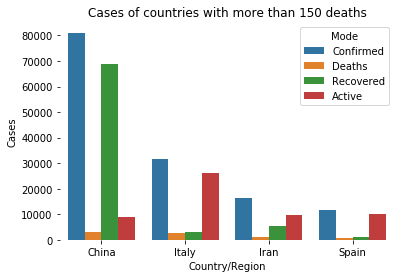

In [166]:
print("### Where deaths > 150")
tb = tabulate_cases(
    qfilter= "(`Deaths` > 150)",
    sorter = {'by':['Confirmed'], 'ascending':False}
).reset_index()

tb = pd.melt(tb, 
             id_vars=['Country/Region'],
#              value_vars=['Confirmed':'Active'],
             var_name='Mode',
             value_name='Cases')

sns.barplot(x='Country/Region', y='Cases', hue='Mode', 
#             dodge=True, 
            data=tb)\
    .set_title('Cases of countries with more than 150 deaths')
sns.despine(left=True, bottom=True)

Text(0.5, 1.0, 'Cases of top 5 states in the US @ Deaths')

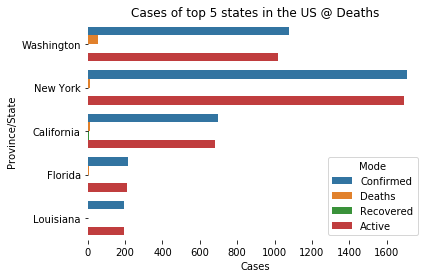

In [179]:
grpz = ['Country/Region', 'Province/State' ]
tb = tabulate_cases(    
    grpz=grpz,
    qfilter= "(`Country/Region` == 'US')",
    sorter = {'by':['Deaths'], 'ascending':False}
).reset_index()

i = 5 
tb = pd.melt(tb[:i], 
             id_vars=grpz,
#              value_vars=['Confirmed':'Active'],
             var_name='Mode',
             value_name='Cases')

sns.barplot(y='Province/State', x='Cases', hue='Mode', 
#             dodge=True, 
            data=tb)\
    .set_title(f'Cases of top {i} states in the US @ Deaths')
sns.despine(left=True, bottom=True)

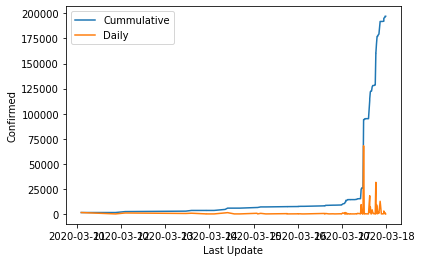

In [192]:
grpz = ['Last Update' ]
tb = tabulate_cases(    
    grpz=grpz
).reset_index()

tb = tb.sort_values(by='Last Update')
tb['cum_confirmed'] =tb['Confirmed'].cumsum()

sns.lineplot(x='Last Update', y='cum_confirmed', data=tb, label='Cummulative')

sns.lineplot(x='Last Update', y='Confirmed', data=tb, label='Daily')
plt.title = 'Global Confirmed Cases'
plt.show(); 

# Scipy Stats

### Top 10 country data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 141
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  27 non-null     object        
 1   Last Update     27 non-null     datetime64[ns]
 2   Confirmed       27 non-null     int64         
 3   Deaths          27 non-null     int64         
 4   Recovered       27 non-null     int64         
 5   Active          27 non-null     int64         
 6   tmp_date        27 non-null     int64         
 7   tmp_logcases    27 non-null     float64       
 8   tmp_grp         27 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 2.1+ KB


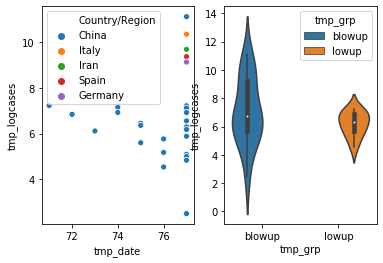

In [234]:
print("### Top 10 country data")
grpz = ['Country/Region', 'Last Update' ]
tb = tabulate_cases(
    grpz = grpz,
    sorter = {'by':['Confirmed'], 'ascending':False}
).reset_index()

countriez = list(tb[:5]['Country/Region'].values)
countriez

tb = tb.query("`Country/Region` == @countriez")

tb['tmp_date'] = tb['Last Update'].dt.dayofyear
tb['tmp_logcases'] = tb['Confirmed'].apply(np.log)
tb['tmp_grp'] = np.where( tb['tmp_date'] > 76, 'blowup', 'lowup')
tb['tmp_grp'].value_counts()

tb.head()

tb.info()

plt.subplot(1,2,1)
sns.scatterplot(x='tmp_date', y='tmp_logcases', hue='Country/Region', data=tb)
plt.subplot(1,2,2)
sns.violinplot(x='tmp_grp', y='tmp_logcases', hue='tmp_grp', data=tb)
plt.show();

### 1. Normality test, Distributions and t-test sample differences

In [259]:
## 1. Normality test 
stats.shapiro( tb[ tb['tmp_grp'] == 'blowup']['tmp_logcases'] )
stats.shapiro( tb[ tb['tmp_grp'] == 'lowup']['tmp_logcases'] )

# stats.normaltest( tb[ tb['tmp_grp'] == 'lowup']['tmp_logcases'] )

stats.ks_2samp(tb[ tb['tmp_grp'] == 'blowup']['tmp_logcases'] ,
               tb[ tb['tmp_grp'] == 'lowup']['tmp_logcases'] )

(0.9622913599014282, 0.7035103440284729)

(0.9470221996307373, 0.6061739921569824)

Ks_2sampResult(statistic=0.3125, pvalue=0.45206032108710814)

By Shapiro-Wilk normality test, the two samples can be said to be normally distributed; p-values are high and we fail to reject null (p-value=0.703 and 0.606 resp)

By KS, the two samples are from the same distribution (p-value = 0.452)

TODO: small sample size issue
- From docs: 
`Shapiro-Wilk: The chance of rejecting the null hypothesis when it is true is close to 5%
regardless of sample size.`

In [236]:
## 2. Ho test two sample - Are the statistically different
stats.ttest_ind( tb[ tb['tmp_grp'] == 'blowup']['tmp_logcases'],
                 tb[ tb['tmp_grp'] == 'lowup']['tmp_logcases']
               )

Ttest_indResult(statistic=1.1996811580044784, pvalue=0.24150965183903988)

p-value = 0.24
The two samples are not statistically different

In [240]:
## 3. regressing logcases ~ group === t.test 
# lets compare
tb['tmp_grp_i'] = np.where( tb['tmp_grp'] == 'blowup', 1, 0 )

stats.linregress( tb['tmp_grp_i'], tb['tmp_logcases'] )

LinregressResult(slope=0.884041418436383, intercept=6.1927785083344595, rvalue=0.2333143207360774, pvalue=0.24150965183903988, stderr=0.7368969767824615)

- Regressing var ~ grouping is equivalent to doing a t-test for var against the groupings.
groupings are coded int. The y intercept is the mean of group = 0 and the x coefficients are the increments on that group from group = 0

- As can see from above, p = 0.2415. So the groups are not different. 

- In this case we have two groups. The mean for group==0 is 6.19 and that of group = 1 is (6.19 + 0.88 = 7.07)

In [239]:
tb.groupby(['tmp_grp'])['tmp_logcases'].describe()

,count,mean,std,min,25%,50%,75%,max
tmp_grp,,,,,,,,
blowup,16.0,7.076820,2.325237,2.484907,5.682299,6.737796,9.192711,11.124303
lowup,11.0,6.192779,0.859697,4.532599,5.678381,6.356108,6.883071,7.230563


As expected, the means match the regression results above

In [271]:
## 4. Correlations
## i. R2
stats.pearsonr(  tb['tmp_logcases'] , tb['tmp_grp_i'] )

## ii. using spearman R2
stats.spearmanr(  tb['tmp_logcases'] , tb['tmp_grp_i'] )

## iii. Anova
print("Anova @ grp")
stats.f_oneway(tb[ tb['tmp_grp'] == 'blowup']['tmp_logcases'],
                    tb[ tb['tmp_grp'] == 'lowup']['tmp_logcases'])

print("Anova @ country")
stats.f_oneway(tb[ tb['Country/Region'] == 'China']['tmp_logcases'],
                    tb[ tb['Country/Region'] == 'Italy']['tmp_logcases'],
                    tb[ tb['Country/Region'] == 'Iran']['tmp_logcases'],
                    tb[ tb['Country/Region'] == 'Spain']['tmp_logcases'])

(0.2333143207360774, 0.24150965183903958)

SpearmanrResult(correlation=0.17419717375622187, pvalue=0.38484935097198714)

Anova @ grp


F_onewayResult(statistic=1.4392348808709674, pvalue=0.24150965183903972)

Anova @ country


F_onewayResult(statistic=4.855798053004624, pvalue=0.009671311350363171)

### 2. Models


In [270]:
md = stats.linregress(tb['tmp_logcases'], tb['Deaths'])
md

print("Predicted Deaths based on number of cases ")
for c in np.arange(30000, 110000, step=10000):
    xi = np.log( c )
    yi = md.intercept + (md.slope * xi)
    print(f"# Cases {c} \t predicted deaths: {yi}")


LinregressResult(slope=290.7684740972841, intercept=-1683.43594204793, rvalue=0.7204603066966841, pvalue=2.255518050130394e-05, stderr=55.977219865257176)

Predicted Deaths based on number of cases 
# Cases 30000 	 predicted deaths: 1314.0824926287482
# Cases 40000 	 predicted deaths: 1397.7313698606968
# Cases 50000 	 predicted deaths: 1462.6144797809789
# Cases 60000 	 predicted deaths: 1515.6278406449983
# Cases 70000 	 predicted deaths: 1560.449998599429
# Cases 80000 	 predicted deaths: 1599.2767178769468
# Cases 90000 	 predicted deaths: 1633.5243114292994
# Cases 100000 	 predicted deaths: 1664.159827797229
